In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.offsetbox import AnchoredText
from matplotlib.patches import FancyBboxPatch
from scipy.cluster.hierarchy import linkage, dendrogram
import json

from Bio import SeqIO
import gzip
import requests
from tqdm import tqdm


%reload_ext autoreload
%autoreload
import dinucleo_freq as dnf

In [121]:
with open("observed.json", "r") as f:
    observed = json.load(f)
with open("theo.json", "r") as f:
    theo = json.load(f)
with open("organisms.json", "r") as f:
    organisms = json.load(f)

dist_obs = pd.read_csv("dist_obs.tsv", sep="\t", index_col=0)
dist_th = pd.read_csv("dist_th.tsv", sep="\t", index_col=0)

In [146]:
dist_th

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT
G.gallus,0.083500,0.061000,0.061000,0.083500,0.061000,0.044500,0.044500,0.061000,0.061000,0.044500,0.044500,0.061000,0.083500,0.061000,0.061000,0.083500
E.coli,0.060467,0.062483,0.062483,0.060467,0.062483,0.064567,0.064567,0.062483,0.062483,0.064567,0.064567,0.062483,0.060467,0.062483,0.062483,0.060467
D.melanogaster,0.084100,0.060900,0.060900,0.084100,0.060900,0.044100,0.044100,0.060900,0.060900,0.044100,0.044100,0.060900,0.084100,0.060900,0.060900,0.084100
A.thaliana,0.102200,0.057600,0.057600,0.102200,0.057600,0.032500,0.032500,0.057600,0.057600,0.032500,0.032500,0.057600,0.102200,0.057600,0.057600,0.102200
S.cerevisiae,0.095666,0.058984,0.058984,0.095666,0.058984,0.036366,0.036366,0.058984,0.058984,0.036366,0.036366,0.058984,0.095666,0.058984,0.058984,0.095666
C.elegans,0.104200,0.057200,0.057200,0.104200,0.057200,0.031400,0.031400,0.057200,0.057200,0.031400,0.031400,0.057200,0.104200,0.057200,0.057200,0.104200
M.musculus,0.085100,0.060800,0.060800,0.085100,0.060800,0.043400,0.043400,0.060800,0.060800,0.043400,0.043400,0.060800,0.085100,0.060800,0.060800,0.085100
P.dumerilii,0.093900,0.059300,0.059300,0.093900,0.059300,0.037500,0.037500,0.059300,0.059300,0.037500,0.037500,0.059300,0.093900,0.059300,0.059300,0.093900
D.rerio,0.100500,0.058000,0.058000,0.100500,0.058000,0.033500,0.033500,0.058000,0.058000,0.033500,0.033500,0.058000,0.100500,0.058000,0.058000,0.100500
B.subtilis,0.079700,0.061500,0.061500,0.079700,0.061500,0.047300,0.047300,0.061500,0.061500,0.047300,0.047300,0.061500,0.079700,0.061500,0.061500,0.079700


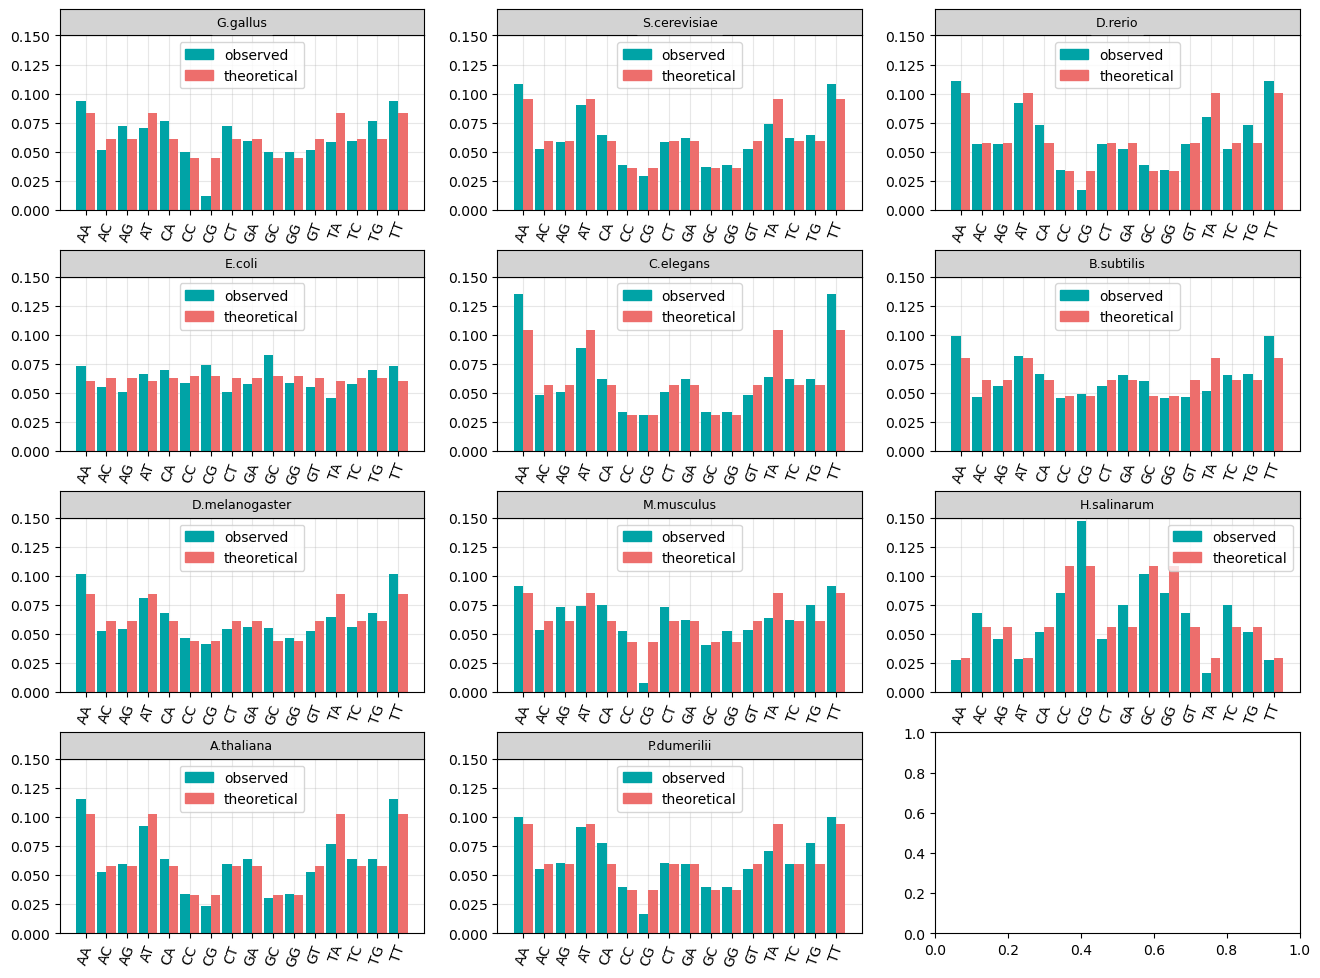

In [127]:
fig, axs = plt.subplots(4, 3, figsize=(16, 12))

j=0

for i in range(len(observed1)):
    
    k = i%4
    
    dinucleotides = []
    frequencies_obs = []
    frequencies_theo = []
    for key in observed[i]:
        dinucleotides.append(str(key))
        frequencies_obs.append(observed[i][key])
        frequencies_theo.append(theo[i][key])    

    bar_width = 0.45
    x_pos = np.arange(len(dinucleotides)) 

    axs[k,j].bar(x_pos - bar_width/2, frequencies_obs, width=bar_width, color='#00A3A6', zorder=2)
    axs[k,j].bar(x_pos + bar_width/2, frequencies_theo, width=bar_width, color='#ED6E6C',  zorder=2)

    #axs[k,j].set_xlabel('Dinucleotide')
    #axs[k,j].set_ylabel('Frequency')
    axs[k,j].set_title(f'{organisms[str(i)]}')
    axs[k,j].set_xticks(x_pos)
    axs[k,j].set_xticklabels(dinucleotides, rotation=70)
    axs[k,j].set_ylim(0, 0.15)


    obs_patch = mpatches.Patch(color='#00A3A6', label='observed')
    theo_patch = mpatches.Patch(color='#ED6E6C', label='theoretical')
    if organisms1[i] == 'H.salinarum':
        axs[k,j].legend(handles=[obs_patch, theo_patch], loc='upper right')
    else:
        axs[k,j].legend(handles=[obs_patch, theo_patch], loc='upper center')

    axs[k,j].grid(zorder=0, alpha=0.3)
    
    
    divider = make_axes_locatable(axs[k,j])
    cax = divider.append_axes("top", size="15%", pad=0)
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_facecolor('lightgrey')

    at = AnchoredText(f'{organisms[str(i)]}', loc=10,
                          prop=dict(backgroundcolor='lightgrey',
                                    size=9, color='black'), frameon=False)
    cax.add_artist(at)
        
    if k == 3:
        j+=1

#plt.title(f"Dinucleotide frequency in model organisms' genomes\n")
plt.show()

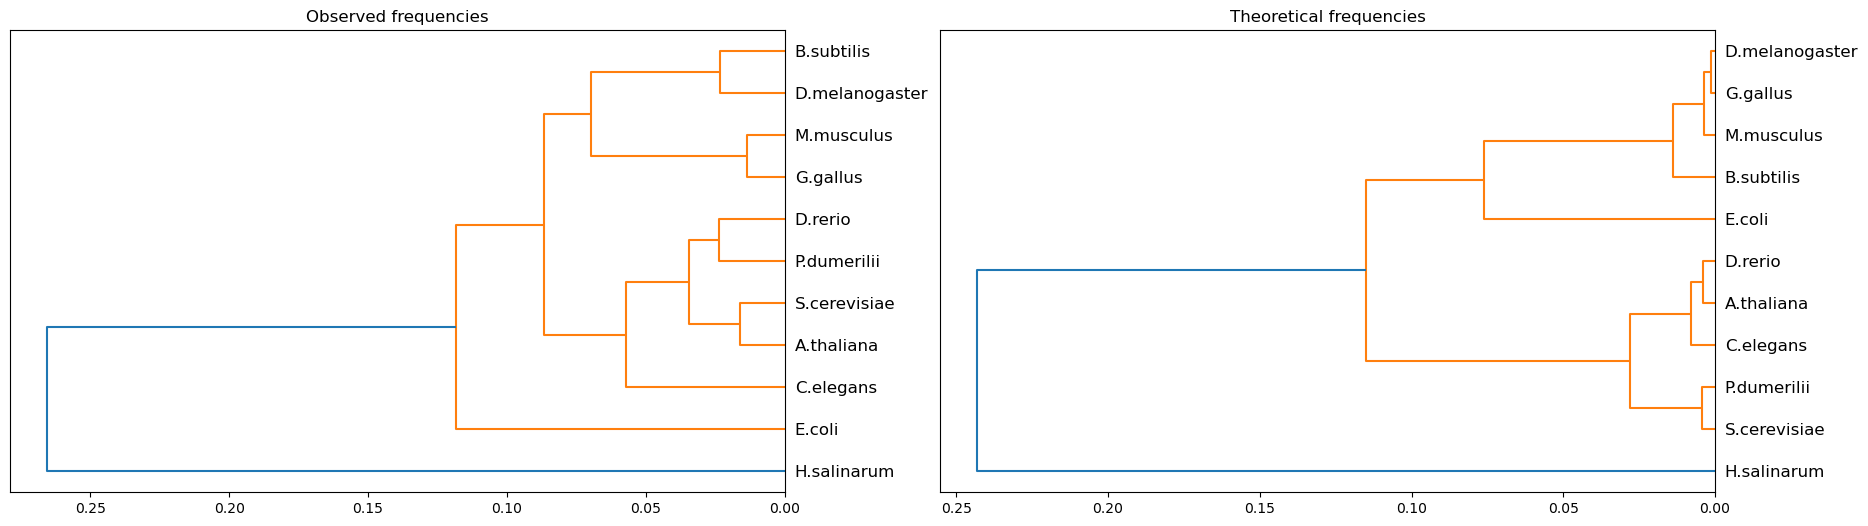

In [128]:
fig = plt.figure(figsize=(22, 6))

linkage_matrix1 = linkage(dist_obs, method='ward')
ax1 = fig.add_subplot(121)
dendrogram(linkage_matrix1, labels=list(dist_obs.index), orientation='left')
ax1.set_title('Observed frequencies')


linkage_matrix2 = linkage(dist_th, method='ward')
ax2 = fig.add_subplot(122)
dendrogram(linkage_matrix2, labels=list(dist_th.index), orientation='left')
ax2.set_title('Theoretical frequencies')


plt.show()


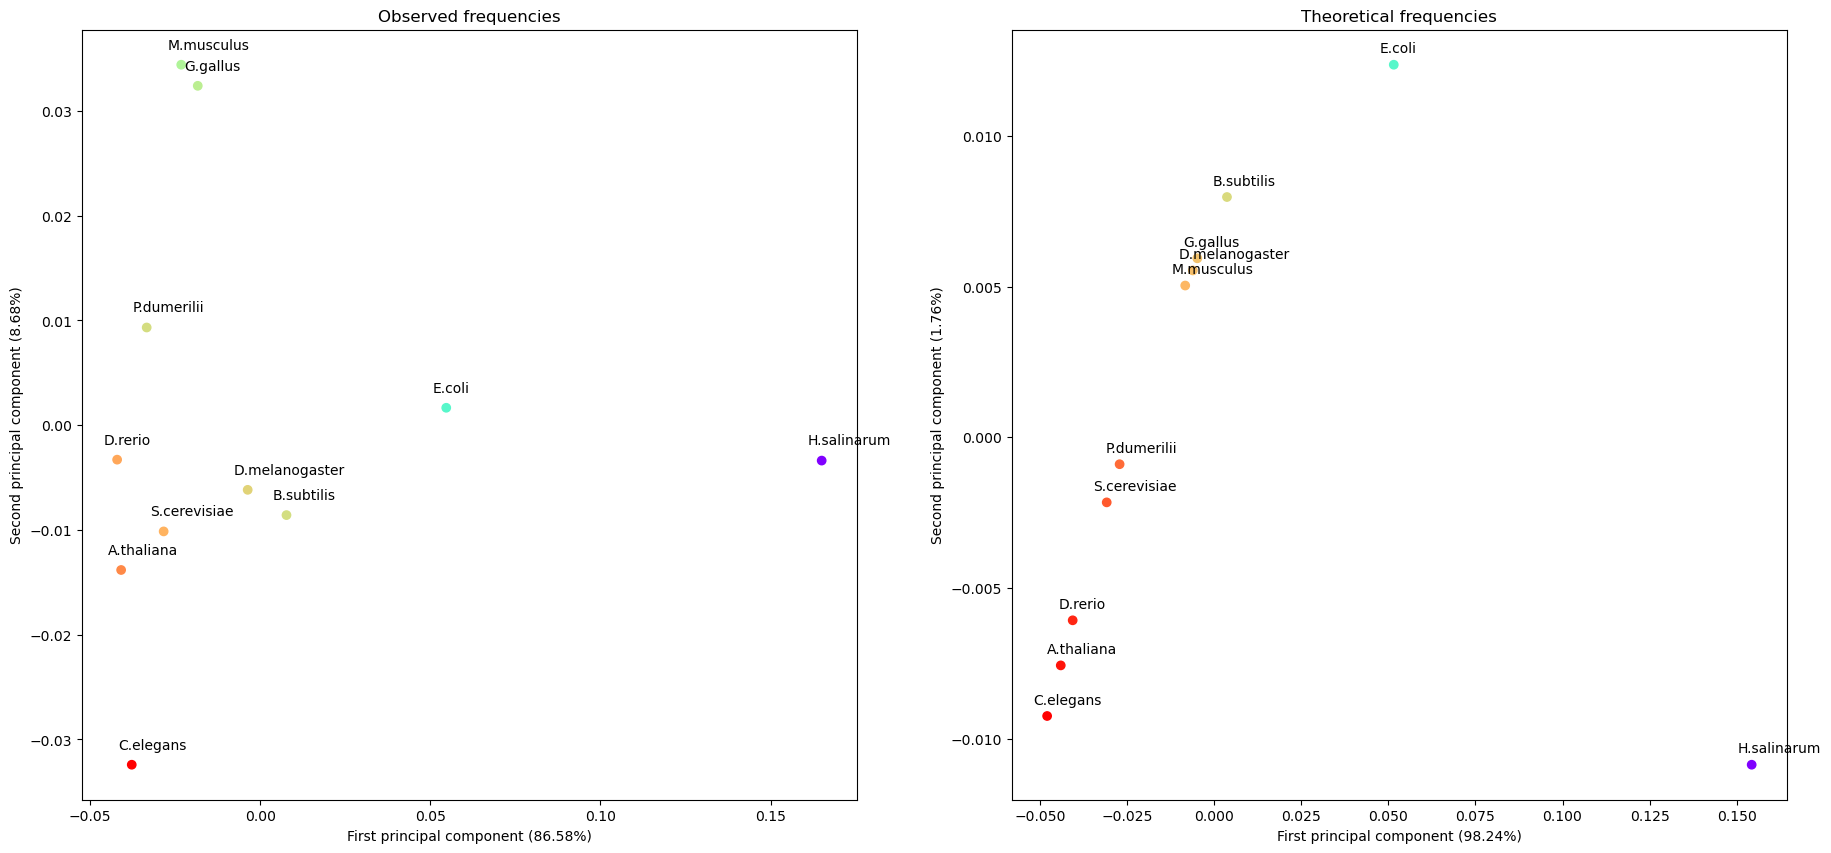

In [145]:
fig = plt.figure(figsize=(22, 10))

X = dist_obs.iloc[:, :-1].values
y = dist_obs.iloc[:, -1].values

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

variance_ratio = pca.explained_variance_ratio_
ax1 = fig.add_subplot(121)
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='rainbow')
ax1.set_xlabel(f'First principal component ({variance_ratio[0]*100:.2f}%)')
ax1.set_ylabel(f'Second principal component ({variance_ratio[1]*100:.2f}%)')

for i, label in enumerate(dist_obs.index):
    ax1.text(X_pca[i, 0]-0.004, X_pca[i, 1]+0.0015, label)

ax1.set_title('Observed frequencies')


X = dist_th.iloc[:, :-1].values
y = dist_th.iloc[:, -1].values

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

variance_ratio = pca.explained_variance_ratio_
ax2 = fig.add_subplot(122)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='rainbow')
ax2.set_xlabel(f'First principal component ({variance_ratio[0]*100:.2f}%)')
ax2.set_ylabel(f'Second principal component ({variance_ratio[1]*100:.2f}%)')

for i, label in enumerate(dist_th.index):
    ax2.text(X_pca[i, 0]-0.004, X_pca[i, 1]+0.0004, label)
ax2.set_title('Theoretical frequencies')

plt.show()

